In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load evaluation model

In [2]:
model_to_load = "distance_based_reward_positive_2024-08-05-17-31"
checkpoint = 5

In [3]:
path_to_npz = f"../eval/{model_to_load}/evaluations.npz"

def create_df_from_evaluations(path_to_npz: str):
    data = {}
    with np.load(path_to_npz) as evaluation_file:

        timesteps = evaluation_file["timesteps"]
        results = evaluation_file["results"]
        ep_length = evaluation_file["ep_lengths"]

        result = zip(timesteps, results, ep_length)
        data["timesteps"] = []
        data["mean_reward"] = []
        data["std_reward"] = []
        data["result"] = []
        for step, reward, length in result:

            data["timesteps"].append(step)
            for eval_episode in range(len(reward)):
                data[f"eval_{eval_episode}"] = data.get(f"eval_{eval_episode}", [])
                data[f"eval_{eval_episode}"].append(reward[eval_episode])

                data[f"length_{eval_episode}"] = data.get(f"length_{eval_episode}", [])
                data[f"length_{eval_episode}"].append(length[eval_episode])
            data["mean_reward"].append(np.mean(reward))
            data["std_reward"].append(np.std(reward))

            data["result"].append(reward)
        
        
    df = pd.DataFrame(data=data)
    #print(df.head())
    return df 
#df = create_df_from_evaluations(path_to_npz=path_to_npz)

### Plot rewards for the different evaluations

In [4]:
def plot_eval_reward(df : pd.DataFrame, model_to_load : str, checkpoint: int = 5):

    x = df.timesteps
    x = x - x.min()
    x = x // 500.0

    if len(x) != 200:
        return


    y = df.mean_reward
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(x, y, label="average episode reward")
    xticks = np.arange(0, 200 + 10, 10) 
    ax.set_xticks(xticks)

    ax.set_xlabel('evaluation number')
    ax.set_ylabel("average episode reward")
    #plt.suptitle(f"")
    plt.legend()
    plt.tight_layout()
    plt.ylim(bottom=0)
    #plt.ylim(top=0.5)
    plt.savefig(f"../plots/eval/{model_to_load}.png")
    plt.show()
#plot_eval_reward(df=df, model_to_load=model_to_load, checkpoint=checkpoint)

### plots for comparison between pretrained model and model trained

### chain plots

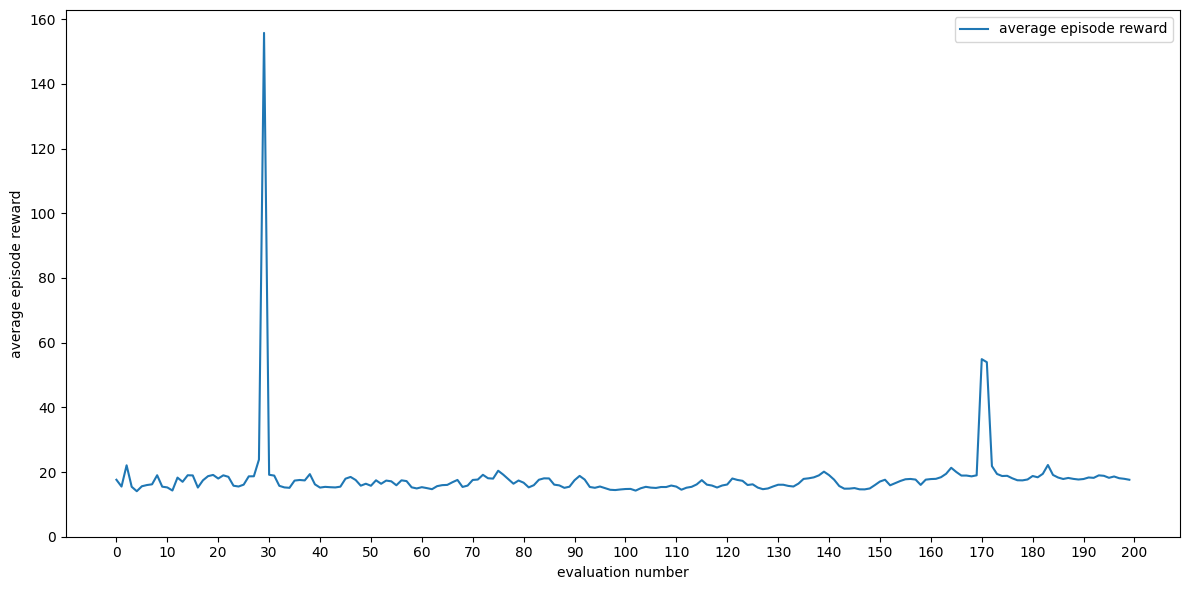

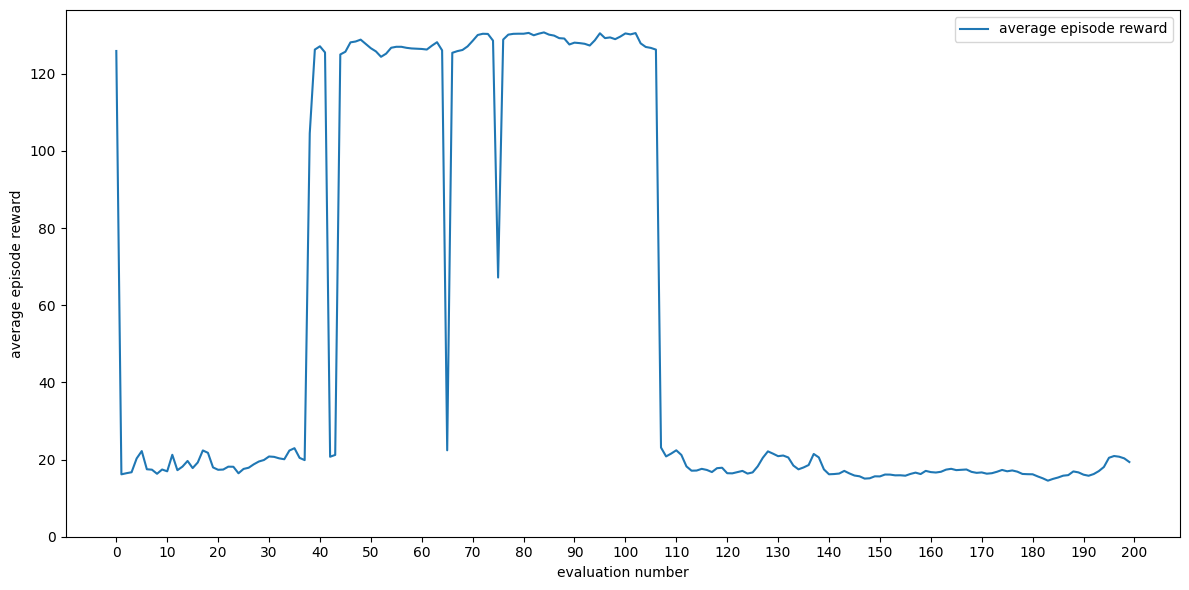

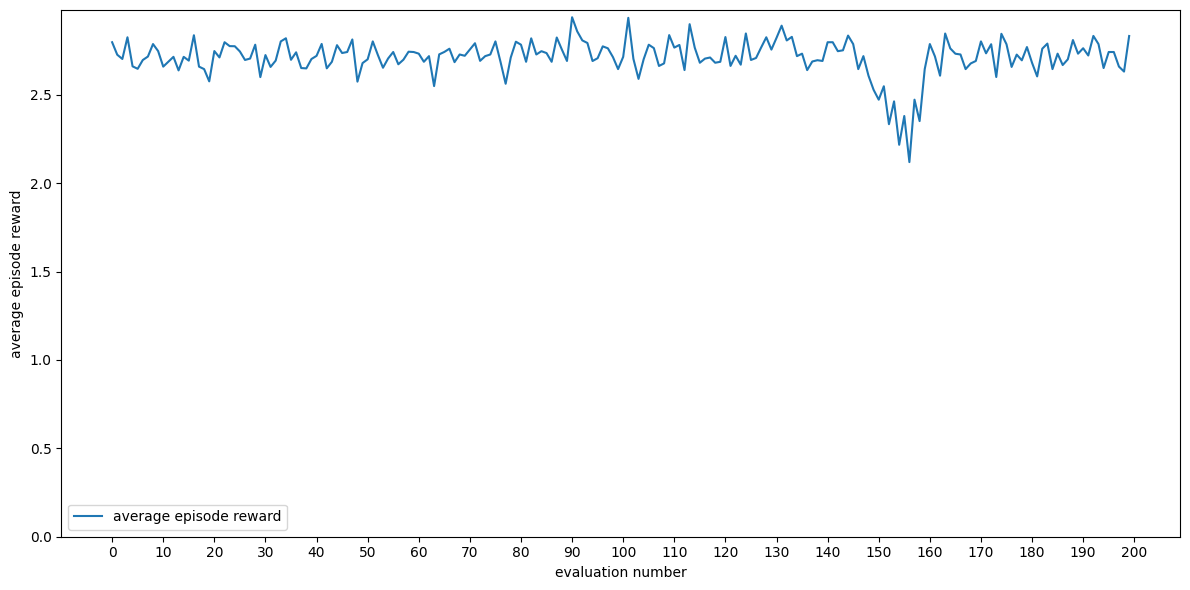

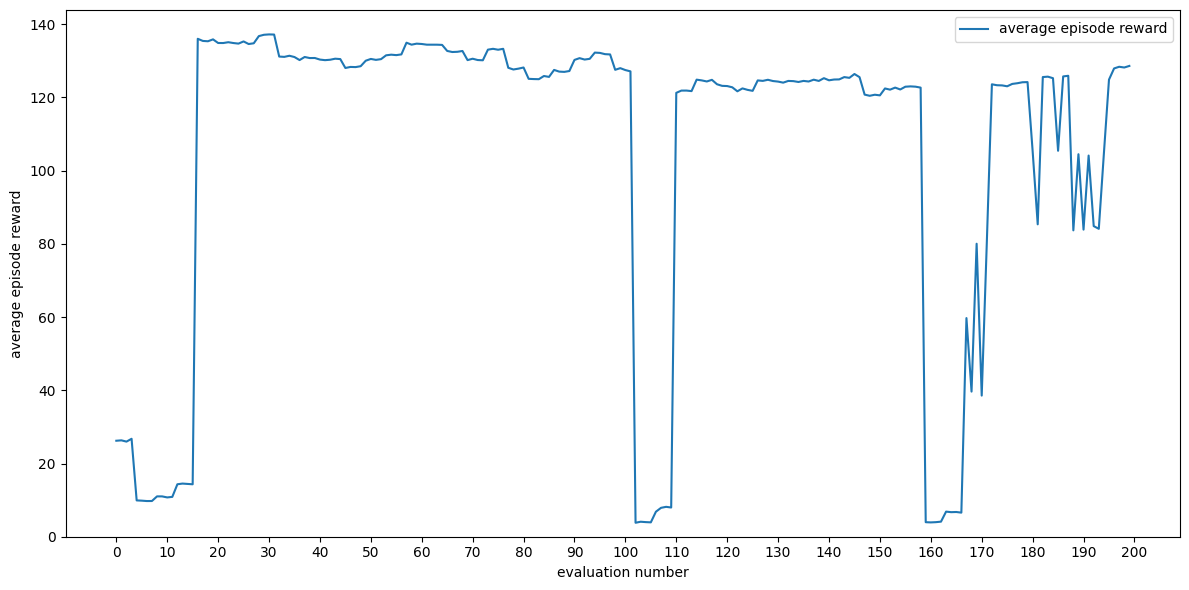

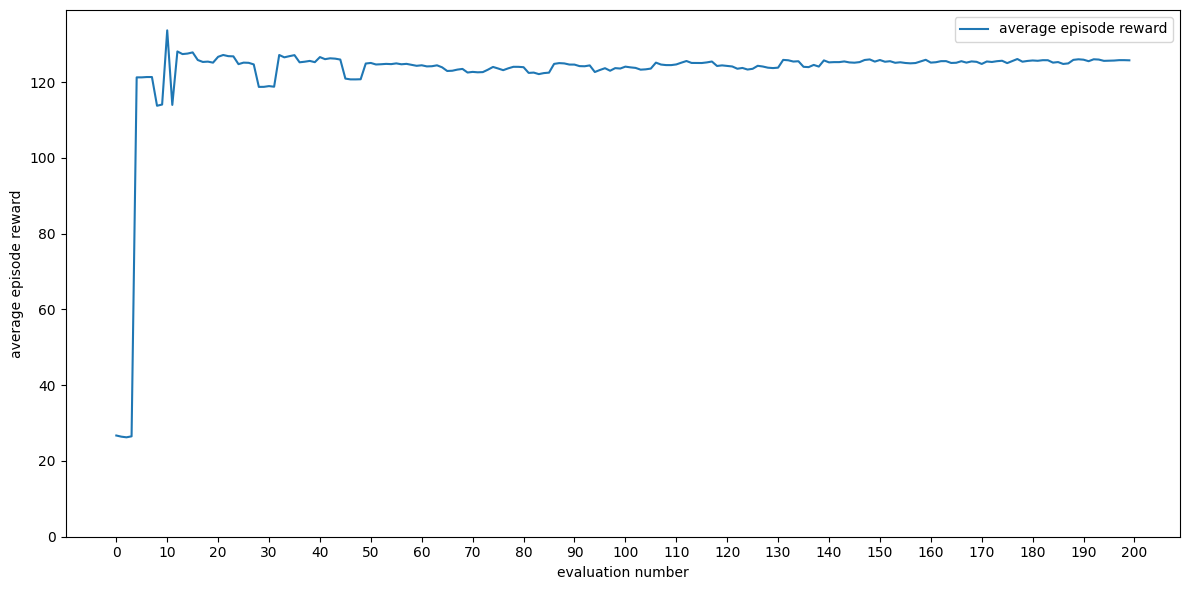

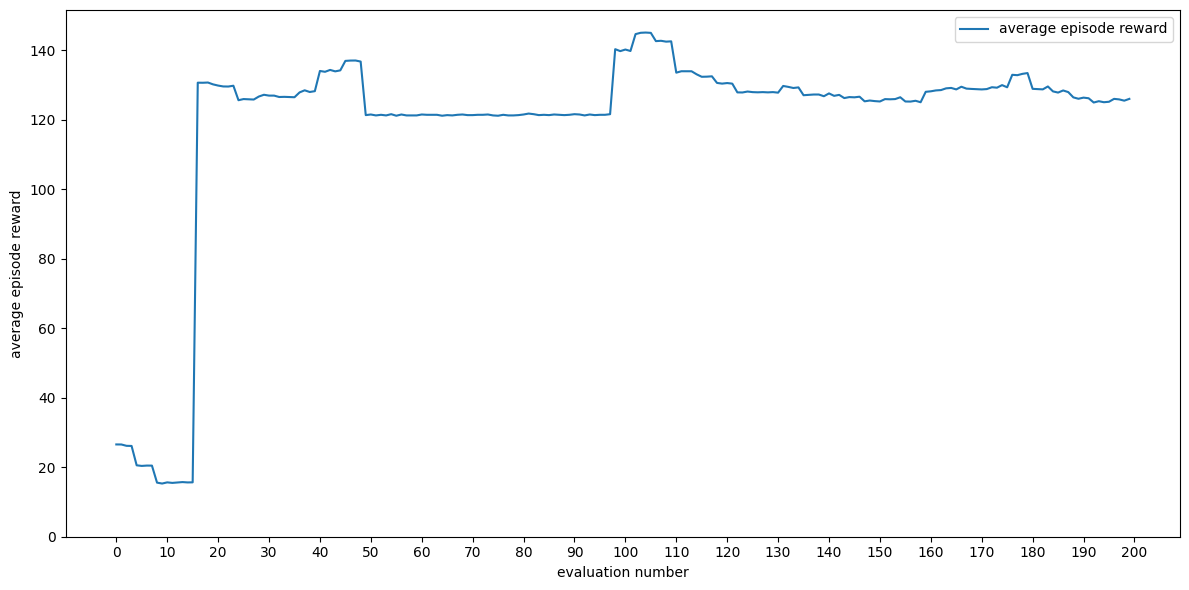

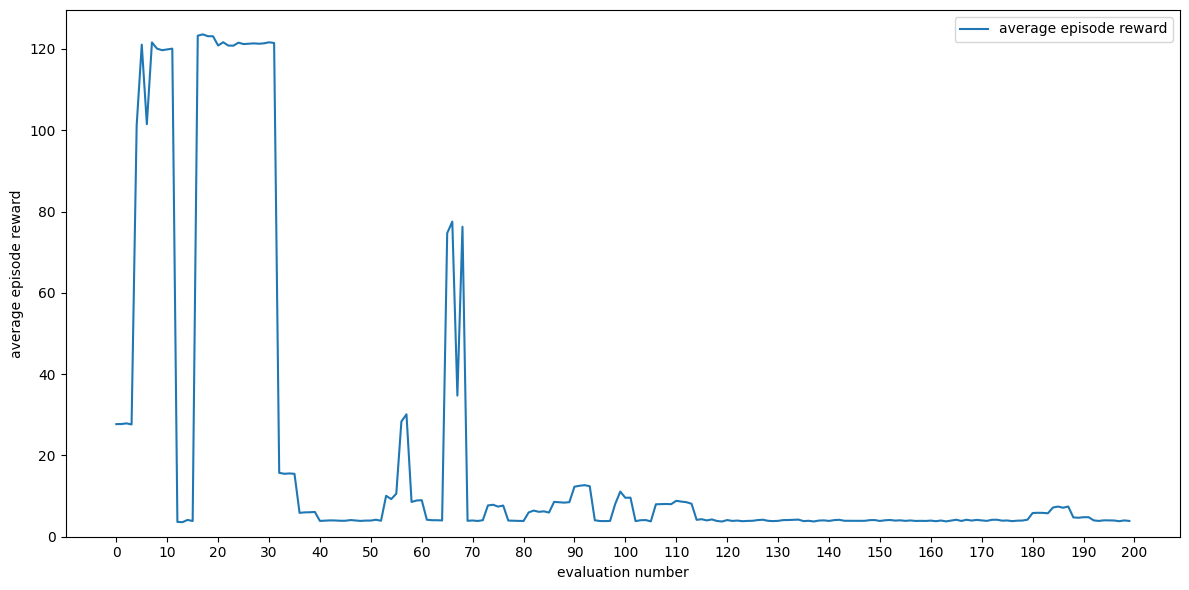

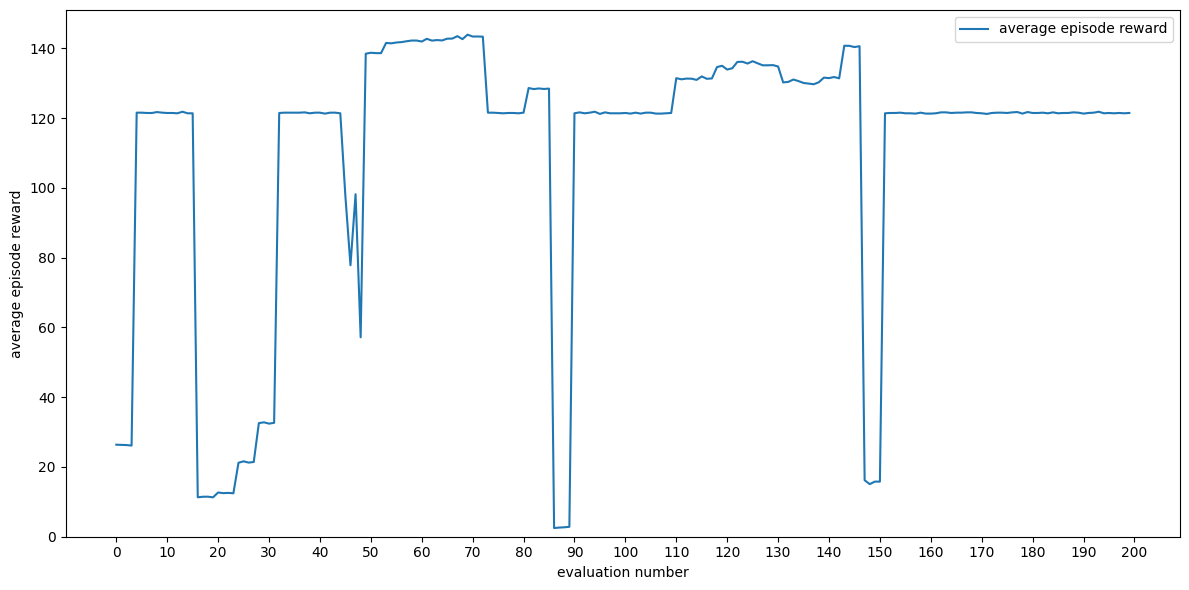

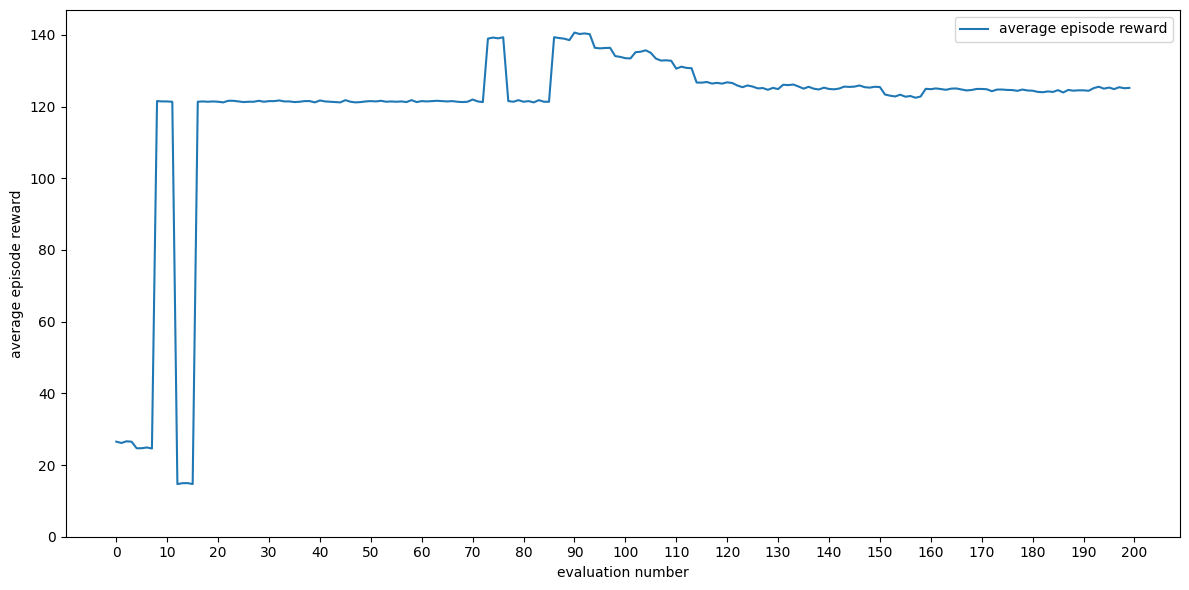

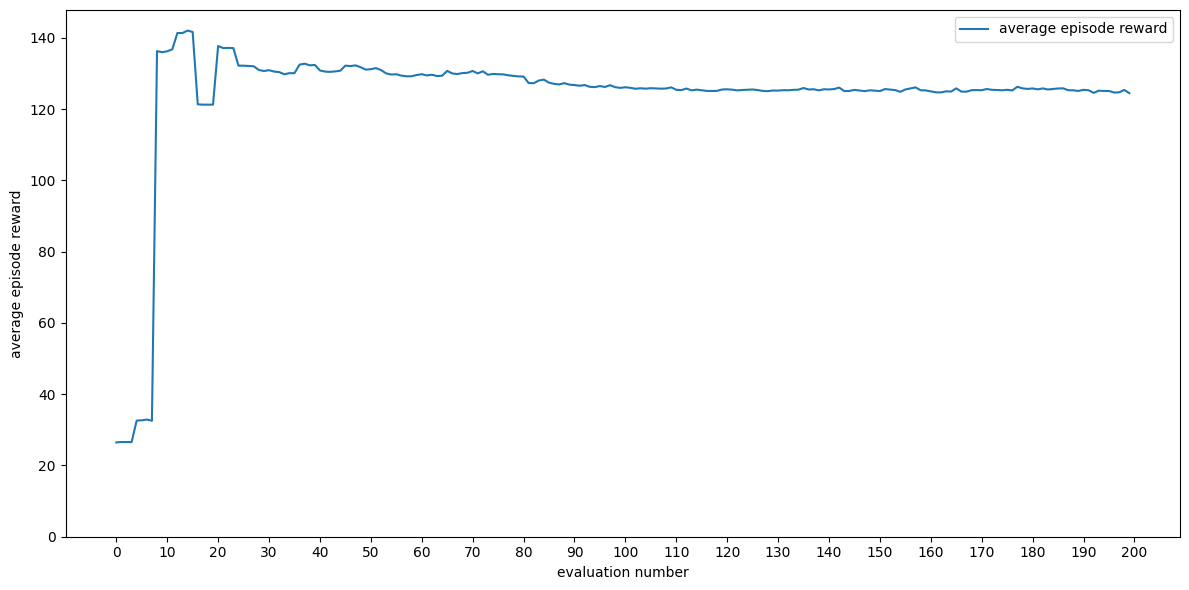

In [24]:
import os 
import re

base_path = "../eval/"
directories = []

files = os.listdir(base_path)

for file in files:
    if file.startswith("distance_based_reward_positive"):
        path = os.path.join(base_path, file)
        path = os.path.join(path, "evaluations.npz")

        if not os.path.exists(path=path):
            continue

        df = create_df_from_evaluations(path_to_npz=path)
        plot_eval_reward(df, file, checkpoint=5)

        

In [28]:
# rename

import wandb
import os

api = wandb.Api()

entity="spigeleerloic"
project="donkey_training_checkpoint_5"

runs = api.runs(f"{entity}/{project}")

base_path = f"../eval/"

for run in runs:

    tag = run.tags
    if len(tag) <= 0:
        continue

    tag = tag[0].split(" ")
    created_tag = ""

    for i in range(len(tag)):
        if tag[i] in ["-", "_"]:
            continue
        created_tag += tag[i]
        if i != len(tag) - 1:
            created_tag += "_"
        
    if created_tag == "FAILED":
        continue

    #file = f"{base_path}{run.name}.png"
    file = f"{base_path}{run.name}/"
    if os.path.exists(file):
        os.rename(file, f"{base_path}{created_tag}_reward.png")

### Hyperparameter tuning

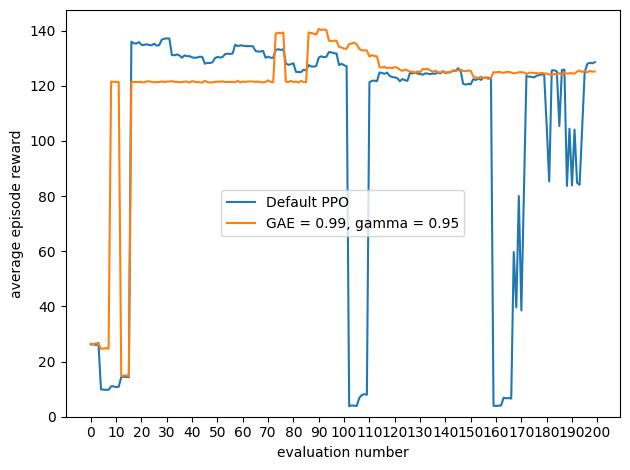

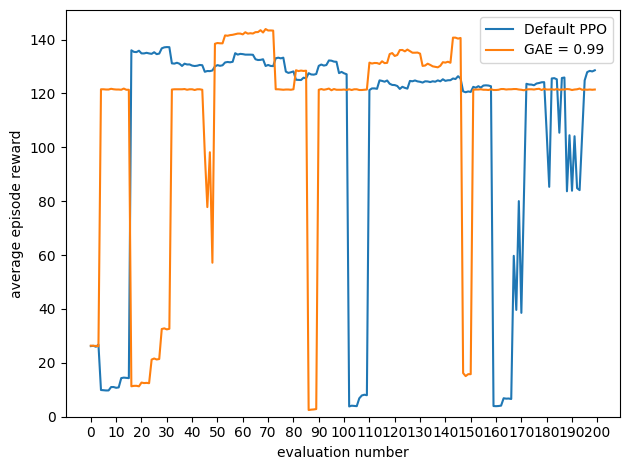

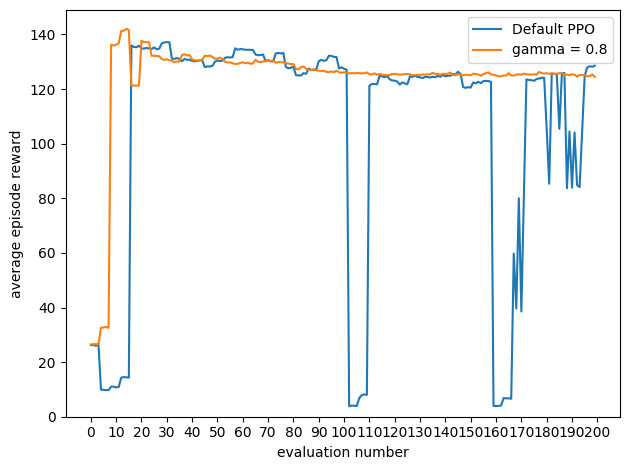

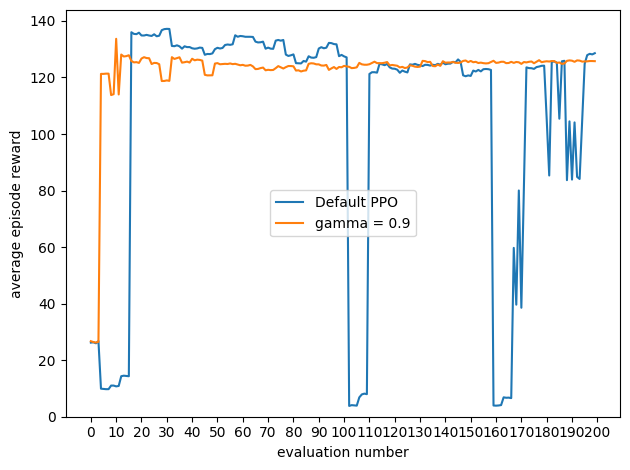

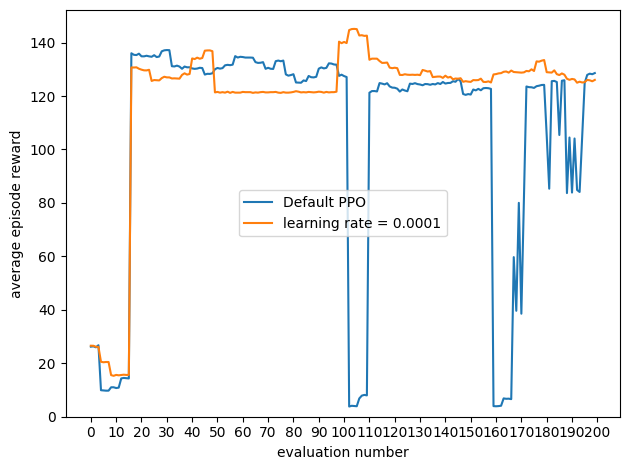

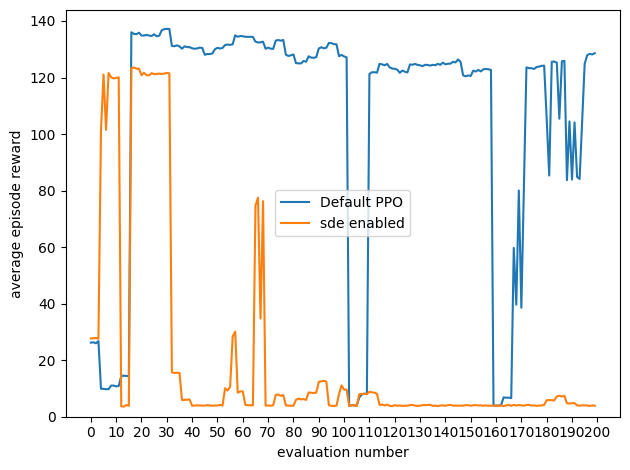

In [13]:
import os 

base_path = "../eval/"
directories = []

default_ppo = f"{base_path}PPO_default_reward/evaluations.npz"
ppo_df = create_df_from_evaluations(path_to_npz=default_ppo)
ppo_x = (ppo_df.timesteps - ppo_df.timesteps.min()) // 500.0
ppo_y = ppo_df.mean_reward

mapping_label={
    "PPO_GAE_gamma_reward" : "GAE = 0.99, gamma = 0.95",
    "PPO_GAE_reward" : "GAE = 0.99",
    "PPO_GAMMA_LOW_reward" : "gamma = 0.8",
    "PPO_lr_reward" : "learning rate = 0.0001",
    "PPO_sde_reward" : "sde enabled",
    "PPO_steps_reward" : "steps = 1024",
    "PPO_gamma_reward" : "gamma = 0.9"
}

files = os.listdir(base_path)

for file in files:
    if not file.startswith("PPO") or file.startswith("PPO_default_reward"):
        continue
    path = os.path.join(base_path, file)
    path = os.path.join(path, "evaluations.npz")

    if not os.path.exists(path=path):
        continue

    df = create_df_from_evaluations(path_to_npz=path)

    x = df.timesteps
    x = x - x.min()
    x = x // 500.0

    if len(x) != 200:
        continue


    y = df.mean_reward
    plt.plot(ppo_x, ppo_y, label="Default PPO")

    plt.plot(x, y, label=mapping_label[file])


    xticks = np.arange(0, 200 + 10, 10) 
    plt.xticks(xticks)

    plt.xlabel('evaluation number')
    plt.ylabel("average episode reward")
    #plt.suptitle(f"")
    plt.legend()
    plt.tight_layout()
    plt.ylim(bottom=0)
    #plt.ylim(top=0.5)
    plt.savefig(f"../plots/eval/hyperparameters_{file}.png")
    plt.show()

        

142.0556668
145.1263332
PPO_GAMMA_LOW_reward


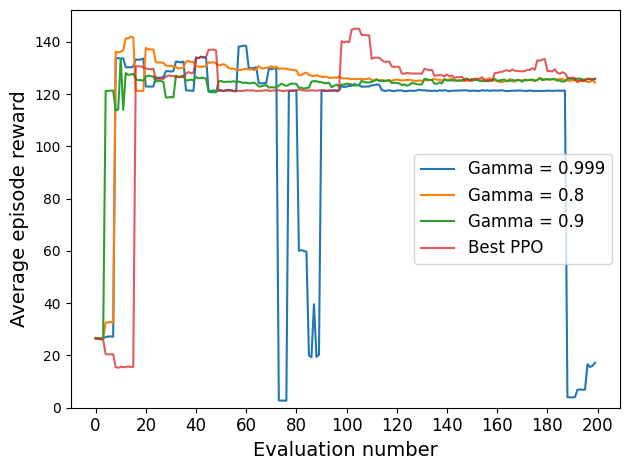

143.8940002
145.1263332
PPO_GAE_reward


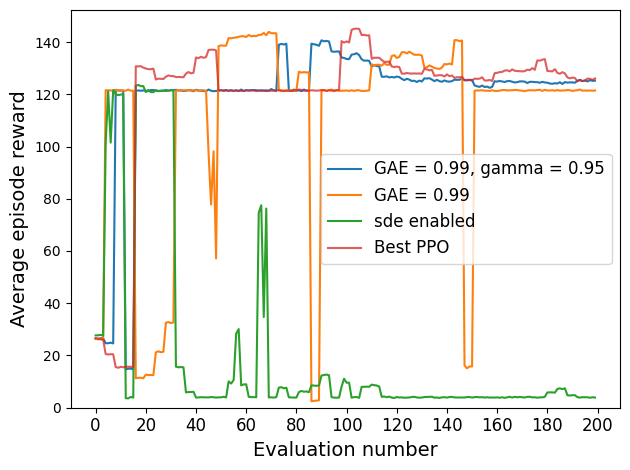

In [6]:
import os 

base_path = "../eval/"
directories = []

default_ppo = f"{base_path}PPO_lr_reward/evaluations.npz"
ppo_df = create_df_from_evaluations(path_to_npz=default_ppo)
ppo_x = (ppo_df.timesteps - ppo_df.timesteps.min()) // 500.0
ppo_y = ppo_df.mean_reward

mapping_label={
    "PPO_GAE_gamma_reward" : "GAE = 0.99, gamma = 0.95",
    "PPO_best" : "Gamma = 0.999",
    "PPO_GAE_reward" : "GAE = 0.99",
    "PPO_GAMMA_LOW_reward" : "Gamma = 0.8",
    #"PPO_lr_reward" : "learning rate = 0.0001",
    "PPO_sde_reward" : "sde enabled",
    "PPO_steps_reward" : "steps = 1024",
    "PPO_gamma_reward" : "Gamma = 0.9"
    
}

group1 = [
    "PPO_gamma_reward",
    "PPO_GAMMA_LOW_reward", 
    "PPO_best"
]

group2 = [
    #"PPO_lr_reward",
    "PPO_sde_reward",
    "PPO_GAE_reward",
    "PPO_GAE_gamma_reward",


]
# another lr ?
max_value = 0.0
best_key = None
groups = [group1, group2]
index = 0
for group in groups:



    for key, value in mapping_label.items():
        if key not in group:
            continue
        path = os.path.join(base_path, key)
        path = os.path.join(path, "evaluations.npz")

        if not os.path.exists(path=path):
            continue

        df = create_df_from_evaluations(path_to_npz=path)

        x = df.timesteps
        x = x - x.min()
        x = x // 500.0

        if len(x) != 200:
            continue

        
        y = df.mean_reward
        plt.plot(x, y, label=mapping_label[key])
        for val in y:
            if val > max_value:
                max_value = val
                best_key = key


    ppo_max = 0.0
    for val in ppo_y:
        ppo_max = max(ppo_max, val)
    print(max_value)
    print(ppo_max)
    print(best_key)
    
    plt.plot(ppo_x, ppo_y, label="Best PPO", alpha=0.75)
    xticks = np.arange(0, 200 + 20, 20) 
    plt.xticks(xticks, fontsize=12)

    plt.xlabel('Evaluation number', fontsize=14)
    plt.ylabel("Average episode reward", fontsize=14)
    #plt.suptitle(f"")
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.ylim(bottom=0)
    #plt.ylim(top=0.5)
    plt.savefig(f"../plots/eval/hyperparameters_{index}.png")
    index += 1
    plt.show()

        

### gather all reward model to plot them

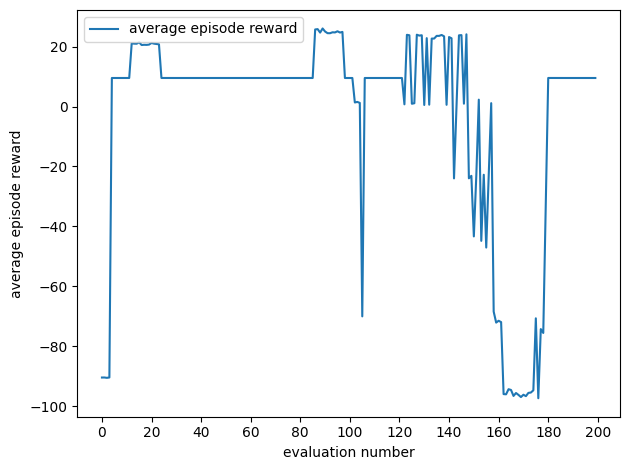

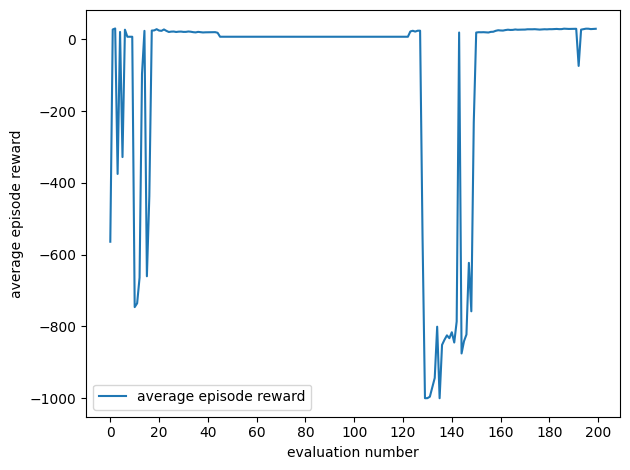

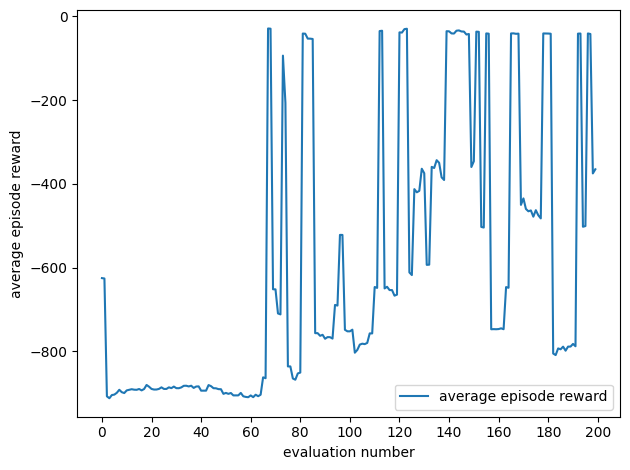

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import wandb
import os

api = wandb.Api()

entity="spigeleerloic"
project="donkey_training_checkpoint_5"

runs = api.runs(f"{entity}/{project}")

base_path = f"../eval/"

for run in runs:

    tag = run.tags
    if len(tag) <= 0:
        continue

    tag = tag[0].split(" ")
    created_tag = ""

    for i in range(len(tag)):
        if tag[i] in ["-", "_"]:
            continue
        created_tag += tag[i]
        if i != len(tag) - 1:
            created_tag += "_"
        
    if created_tag == "REWARD_MODEL":
    
        file = f"{base_path}{run.name}/"
        if os.path.exists(file):
            path = f"{base_path}{run.name}/evaluations.npz"
            df = create_df_from_evaluations(path_to_npz=path)

            x = df.timesteps
            x = x - x.min()
            x = x // 500.0

            y = df.mean_reward
            plt.plot(x, y, label="average episode reward")
            xticks = np.arange(0, 200 + 10, 20) 
            plt.xticks(xticks)

            plt.xlabel('evaluation number')
            plt.ylabel("average episode reward")
            #plt.suptitle(f"")
            plt.legend()
            plt.tight_layout()
            #plt.ylim(bottom=0)
            #plt.ylim(top=0.5)
            plt.savefig(f"../plots/eval/reward_model_{run.name}.png")
            plt.show()
            

### Comparison of algorithms